In [ ]:
import pandas as pd
df = pd.read_excel("/content/Depression_Analysis.xlsx")

In [ ]:
df.head()

,Bangla_Text,Depression_Analysis
0,আজ বলবো কি যে তোমায় তুমি অনেক ভালো থেকো আমি ...,Depressive
1,"জীবনের গতির কথা ভাবলে পা দুটোর গতিও থেমে রয়,, ...",Depressive
2,"ফেলে আসা এক নদীর ধারে, খুজে বেড়াই আমি তারে! দে...",Depressive
3,আপনার হাসি বিশ্বের সাথে ভাগ করুন। এটি বন্ধুত্ব...,Non_Depressive
4,আপনি যা পরেন না তা আপনার হাসির চেয়ে গুরুত্বপূ...,Non_Depressive


In [ ]:
df.isnull().sum()

Bangla_Text            0
Depression_Analysis    0
dtype: int64

In [ ]:
df.dropna()

,Bangla_Text,Depression_Analysis
0,আজ বলবো কি যে তোমায় তুমি অনেক ভালো থেকো আমি ...,Depressive
1,"জীবনের গতির কথা ভাবলে পা দুটোর গতিও থেমে রয়,, ...",Depressive
2,"ফেলে আসা এক নদীর ধারে, খুজে বেড়াই আমি তারে! দে...",Depressive
3,আপনার হাসি বিশ্বের সাথে ভাগ করুন। এটি বন্ধুত্ব...,Non_Depressive
4,আপনি যা পরেন না তা আপনার হাসির চেয়ে গুরুত্বপূ...,Non_Depressive
...,...,...
1735,যে মানুষ ভূল করে না বস্তুবে সে কিছুই করে না,Non_Depressive
1736,নিষ্ঠার সাথে পরিচর্য়া করলে জীবনের লালিত্য বৃদ্...,Non_Depressive
1737,"জীবন এমন একটা স্তম্ভ, যা আমারা একা বহন করতে পা...",Non_Depressive
1738,জীবন মানে অনিশ্চিৎ ভ্রমণ,Non_Depressive


In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
df['Depression_Analysis'].value_counts()

Depressive        870
Non_Depressive    870
Name: Depression_Analysis, dtype: int64

In [ ]:
lb = LabelEncoder()

In [ ]:
df[['Depression_Analysis']]=df[['Depression_Analysis']].apply(lb.fit_transform)

In [ ]:
df['Depression_Analysis'].value_counts()

0    870
1    870
Name: Depression_Analysis, dtype: int64

In [ ]:
df

,Bangla_Text,Depression_Analysis
0,আজ বলবো কি যে তোমায় তুমি অনেক ভালো থেকো আমি ...,0
1,"জীবনের গতির কথা ভাবলে পা দুটোর গতিও থেমে রয়,, ...",0
2,"ফেলে আসা এক নদীর ধারে, খুজে বেড়াই আমি তারে! দে...",0
3,আপনার হাসি বিশ্বের সাথে ভাগ করুন। এটি বন্ধুত্ব...,1
4,আপনি যা পরেন না তা আপনার হাসির চেয়ে গুরুত্বপূ...,1
...,...,...
1735,যে মানুষ ভূল করে না বস্তুবে সে কিছুই করে না,1
1736,নিষ্ঠার সাথে পরিচর্য়া করলে জীবনের লালিত্য বৃদ্...,1
1737,"জীবন এমন একটা স্তম্ভ, যা আমারা একা বহন করতে পা...",1
1738,জীবন মানে অনিশ্চিৎ ভ্রমণ,1


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
#df['length'] = df['Bangla_Text'].str.split().apply(len)
#df.head(20)

In [ ]:
#df.length.describe()

In [ ]:
import string
def remove_punc(s):
    table = str.maketrans({key: None for key in string.punctuation})
    return s.translate(table)

In [ ]:
x = df['Bangla_Text'].fillna(' ')
y = df['Depression_Analysis']
print(x.head())
print(y.head())

0      আজ বলবো কি যে তোমায় তুমি অনেক ভালো থেকো আমি ...
1    জীবনের গতির কথা ভাবলে পা দুটোর গতিও থেমে রয়,, ...
2    ফেলে আসা এক নদীর ধারে, খুজে বেড়াই আমি তারে! দে...
3    আপনার হাসি বিশ্বের সাথে ভাগ করুন। এটি বন্ধুত্ব...
4    আপনি যা পরেন না তা আপনার হাসির চেয়ে গুরুত্বপূ...
Name: Bangla_Text, dtype: object
0    0
1    0
2    0
3    1
4    1
Name: Depression_Analysis, dtype: int64


In [ ]:
x = df['Bangla_Text'].apply(remove_punc)
x.shape

(1740,)

In [ ]:
contractions = {
  "বি.দ্র ": "বিশেষ দ্রষ্টব্য",
  "ড.": "ডক্টর",
  "ডা.": "ডাক্তার",
  "ইঞ্জি:": "ইঞ্জিনিয়ার",
  "রেজি:": "রেজিস্ট্রেশন",
  "মি.": "মিস্টার",
  "মু.": "মুহাম্মদ",
  "মো.": "মোহাম্মদ",
  }


In [ ]:
import re
import string
from collections import Counter
vocab = Counter()
def clean_text(x,remove_stopwords = False):
    if True:
        new_text = []
        for word in x:
            if word in contractions:
                new_text.append(contractions[word])
            else:
                new_text.append(word)
        x = "".join(new_text)
    # Format words and remove unwanted characters
    whitespace = re.compile(u"[\s\u0020\u00a0\u1680\u180e\u202f\u205f\u3000\u2000-\u200a]+", re.UNICODE)
    bangla_digits = u"[\u09E6\u09E7\u09E8\u09E9\u09EA\u09EB\u09EC\u09ED\u09EE\u09EF]+"
    english_chars = u"[a-zA-Z0-9]"
    punc = u"[(),$%^&*+={}\[\]:\"|\'\~`<>/,€¦!?½£¶™¼©⅐⅑⅒⅓⅔⅕⅖⅗⅘⅙⅚⅛⅜⅝⅞⅟↉¤¿º;-]+"
    bangla_fullstop = u"\u0964"     #bangla fullstop(dari)
    punctSeq   = u"['\"“”‘’]+|[.?!,…]+|[:;]+"

    x = re.sub(bangla_digits, " ", x)
    x = re.sub(punc, " ", x)
    x = re.sub(english_chars, " ", x)
    x = re.sub(bangla_fullstop, " ", x)
    x = re.sub(punctSeq, " ", x)
    x = whitespace.sub(" ", x).strip()

    x = re.sub(r'https?:\/\/.*[\r\n]*', '', x, flags=re.MULTILINE)
    x = re.sub(r'\<a href', ' ', x)
    x = re.sub(r'&amp;‘:‘ ’', '', x)
    x = re.sub(r'[_"\-;%()|+&=*%.,!?:#$@\[\]/]। ,', ' ', x)
    x = re.sub(r'<br />', ' ', x)
    x = re.sub(r'\'', ' ', x)
    x = re.sub(r"[\@$#%~+-\.\'।\"]"," ",x)
    x = re.sub(r"(?m)^\s+", "", x)
    x = re.sub("[()]","",x)
    x = re.sub("[‘’]","",x)
    x = re.sub("[!]","",x)
    x = re.sub("[/]","",x)
    x = re.sub("[:]","",x)
    x = re.sub('\ |\?|\.|\!|\/|\;|\:', ' ',x)
    x = x.strip("/")

    if remove_stopwords:
        k = []
        with open('/content/Banglastopword.txt', 'r',encoding="utf-8") as f:
            for word in f:
                word = word.split()
                k.append(word[0])
            x = [t for t in x if t not in k]
            x = "".join(x)


    return x

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import stopwords
import string
import math
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, roc_curve
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
%matplotlib inline

In [ ]:
vocab = CountVectorizer(analyzer=clean_text,encoding='utf-8').fit(x)

In [ ]:
print(len(vocab.vocabulary_))

67


In [ ]:
r0 = x[87]
print(r0)

আমি সত্যিই ব্যার্থ  কারণ আমি কখনোই 
 তোমাকে বুঝাতে পারি নাই আমি 
 তোমাকে কতটা ভালবাসি


In [ ]:
#vocab0 = vocab.transform([r0])
#print(vocab0)

In [ ]:
#print(vocab.get_feature_names()[50])
#print(vocab.get_feature_names()[50])

In [ ]:
x = vocab.transform(x)

In [ ]:
print("Shape of the sparse matrix: ", x.shape)
print("Non-Zero occurences: ",x.nnz)
density = (x.nnz/(x.shape[0]*x.shape[1]))*100
print("Density of the matrix = ",density)

Shape of the sparse matrix:  (1740, 67)
Non-Zero occurences:  43524
Density of the matrix =  37.33401955738548


In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=101)

In [ ]:
from sklearn.naive_bayes import MultinomialNB
mnb = MultinomialNB()
mnb.fit(x_train,y_train)
predmnb = mnb.predict(x_test)
print("Confusion Matrix for Multinomial Naive Bayes:")
print(confusion_matrix(y_test,predmnb))
print("Score:",round(accuracy_score(y_test,predmnb)*100,2))
print("Classification Report:",classification_report(y_test,predmnb))

Confusion Matrix for Multinomial Naive Bayes:
[[199  83]
 [ 85 155]]
Score: 67.82
Classification Report:               precision    recall  f1-score   support

           0       0.70      0.71      0.70       282
           1       0.65      0.65      0.65       240

    accuracy                           0.68       522
   macro avg       0.68      0.68      0.68       522
weighted avg       0.68      0.68      0.68       522



In [ ]:
acc1=metrics.accuracy_score(y_test, predmnb)
print("Accuracy:",acc1*100,"%")

Accuracy: 67.81609195402298 %


In [ ]:
from sklearn.ensemble import RandomForestClassifier
rmfr = RandomForestClassifier()
rmfr.fit(x_train,y_train)
predrmfr = rmfr.predict(x_test)
print("Confusion Matrix for Random Forest Classifier:")
print(confusion_matrix(y_test,predrmfr))
print("Score:",round(accuracy_score(y_test,predrmfr)*100,2))
print("Classification Report:",classification_report(y_test,predrmfr))

Confusion Matrix for Random Forest Classifier:
[[201  81]
 [ 68 172]]
Score: 71.46
Classification Report:               precision    recall  f1-score   support

           0       0.75      0.71      0.73       282
           1       0.68      0.72      0.70       240

    accuracy                           0.71       522
   macro avg       0.71      0.71      0.71       522
weighted avg       0.72      0.71      0.71       522



In [ ]:
acc2=metrics.accuracy_score(y_test,predrmfr)
print("Accuracy:",acc2*100,"%")

Accuracy: 71.455938697318 %


In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)
preddt = dt.predict(x_test)
print("Confusion Matrix for Decision Tree:")
print(confusion_matrix(y_test,preddt))
print("Score:",round(accuracy_score(y_test,preddt)*100,2))
print("Classification Report:",classification_report(y_test,preddt))

Confusion Matrix for Decision Tree:
[[174 108]
 [ 88 152]]
Score: 62.45
Classification Report:               precision    recall  f1-score   support

           0       0.66      0.62      0.64       282
           1       0.58      0.63      0.61       240

    accuracy                           0.62       522
   macro avg       0.62      0.63      0.62       522
weighted avg       0.63      0.62      0.63       522



In [ ]:
acc3=metrics.accuracy_score(y_test,preddt)
print("Accuracy:",acc3*100,"%")

Accuracy: 62.45210727969349 %


In [ ]:
from sklearn.svm import SVC
svm = SVC(random_state=101)
svm.fit(x_train,y_train)
predsvm = svm.predict(x_test)
print("Confusion Matrix for Support Vector Machines:")
print(confusion_matrix(y_test,predsvm))
print("Score:",round(accuracy_score(y_test,predsvm)*100,2))
print("Classification Report:",classification_report(y_test,predsvm))

Confusion Matrix for Support Vector Machines:
[[179 103]
 [ 54 186]]
Score: 69.92
Classification Report:               precision    recall  f1-score   support

           0       0.77      0.63      0.70       282
           1       0.64      0.78      0.70       240

    accuracy                           0.70       522
   macro avg       0.71      0.70      0.70       522
weighted avg       0.71      0.70      0.70       522



In [ ]:


import pickle

acc4=metrics.accuracy_score(y_test,predsvm)
print("Accuracy:",acc4*100,"%")



Accuracy: 69.92337164750958 %


In [ ]:


from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train,y_train)
predknn = knn.predict(x_test)
print("Confusion Matrix for K Neighbors Classifier:")
print(confusion_matrix(y_test,predknn))
print("Score: ",round(accuracy_score(y_test,predknn)*100,2))
print("Classification Report:")
print(classification_report(y_test,predknn))



Confusion Matrix for K Neighbors Classifier:
[[198  84]
 [ 83 157]]
Score:  68.01
Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.70      0.70       282
           1       0.65      0.65      0.65       240

    accuracy                           0.68       522
   macro avg       0.68      0.68      0.68       522
weighted avg       0.68      0.68      0.68       522



In [ ]:
acc5=metrics.accuracy_score(y_test,predknn)
print("Accuracy:",acc5*100,"%")

Accuracy: 68.00766283524904 %


In [ ]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(x_train,y_train)
predxgb = xgb.predict(x_test)
print("Confusion Matrix for xgboost Classifier:")
print(confusion_matrix(y_test,predxgb))
print("Score: ",round(accuracy_score(y_test,predxgb)*100,2))
print("Classification Report:")
print(classification_report(y_test,predxgb))

Confusion Matrix for xgboost Classifier:
[[198  84]
 [ 65 175]]
Score:  71.46
Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.70      0.73       282
           1       0.68      0.73      0.70       240

    accuracy                           0.71       522
   macro avg       0.71      0.72      0.71       522
weighted avg       0.72      0.71      0.72       522



In [ ]:


acc6=metrics.accuracy_score(y_test,predxgb)
print("Accuracy:",acc6*100,"%")



Accuracy: 71.455938697318 %


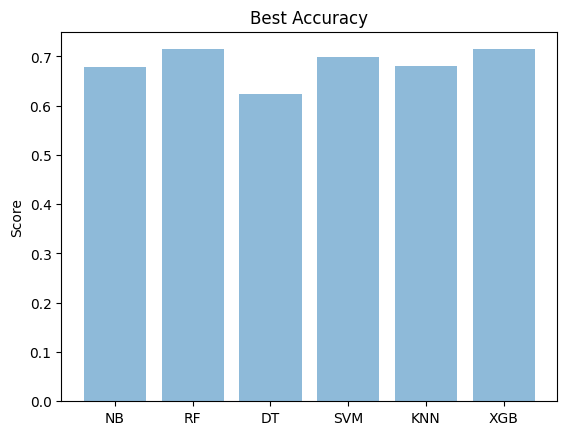

In [ ]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt

objects = ('NB','RF','DT','SVM','KNN','XGB')
y_pos = np.arange(len(objects))
performance = [acc1,acc2,acc3,acc4,acc5,acc6]

plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Score')
plt.title('Best Accuracy')

plt.show()

In [ ]:
headline=input()
prt=vocab.transform([headline])

আমি সত্যিই ব্যার্থ  কারণ আমি কখনোই   তোমাকে বুঝাতে পারি নাই আমি   তোমাকে কতটা ভালবাসি


In [ ]:
m1=svm.predict(prt)
print("Predicted Rating:",m1)
if m1==0:
  print("Depressive")
else:
    print("Non_Depressive")

Predicted Rating: [0]
Depressive


In [ ]:
m2=knn.predict(prt)
print("Predicted Rating:",m2)
if m2==0:
  print("Depressive")
else:
    print("Non_Depressive")

Predicted Rating: [0]
Depressive


In [ ]:
m3=dt.predict(prt)
print("Predicted Rating:",m3)
if m3==0:
  print("Depressive")
else:
    print("Non_Depressive")

Predicted Rating: [0]
Depressive


In [ ]:
m4=mnb.predict(prt)
print("Predicted Rating:",m4)
if m4==0:
  print("Depressive")
else:
  print("Non_Depressive")

Predicted Rating: [0]
Depressive


In [ ]:


m5=rmfr.predict(prt)
print("Predicted Rating:",m5)
if m5==0:
  print("Depressive")
else:
    print("Non_Depressive")



Predicted Rating: [0]
Depressive


In [ ]:
m6=xgb.predict(prt)
print("Predicted Rating:",m6)
if m5==0:
  print("Depressive")
else:
    print("Non_Depressive")

Predicted Rating: [0]
Depressive
